## Regression Problem

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)     #to display all of my columns in the notebook

In [45]:
df = pd.read_csv("car_details_v3.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df.shape

(8128, 13)

In [4]:
df.dtypes.index

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [23]:
df['owner'][df['owner'] == 'Test Drive Car']

4383    Test Drive Car
4950    Test Drive Car
4951    Test Drive Car
4952    Test Drive Car
6220    Test Drive Car
Name: owner, dtype: object

In [17]:
df['seats'][df['seats'] == 2]

5900    2.0
6629    2.0
Name: seats, dtype: float64

In [5]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
cols_with_null_values = [cols for cols in df.columns if df[cols].isnull().sum() > 0]

for cols in cols_with_null_values:
    #finding percentage of missing values in each feature column
    print(cols, np.round(df[cols].isnull().mean(), 4), '% missing values found.')

mileage 0.0272 % missing values found.
engine 0.0272 % missing values found.
max_power 0.0265 % missing values found.
torque 0.0273 % missing values found.
seats 0.0272 % missing values found.


#### Finding all the numerical feature columns

In [7]:
numerical_cols = [cols for cols in df.columns if df[cols].dtypes != 'O']
df[numerical_cols].head()

,year,selling_price,km_driven,seats
0,2014,450000,145500,5.0
1,2014,370000,120000,5.0
2,2006,158000,140000,5.0
3,2010,225000,127000,5.0
4,2007,130000,120000,5.0


In [32]:
df.groupby('km_driven')['selling_price'].median()

km_driven
1          209000.0
1000       577000.0
1300       325000.0
1303       690000.0
1500       840000.0
             ...   
475000     400000.0
500000     289999.5
577414     194000.0
1500000    500000.0
2360457    550000.0
Name: selling_price, Length: 921, dtype: float64

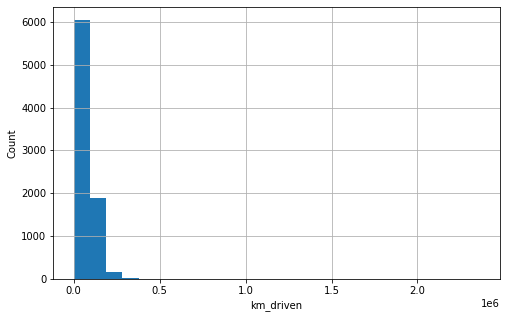

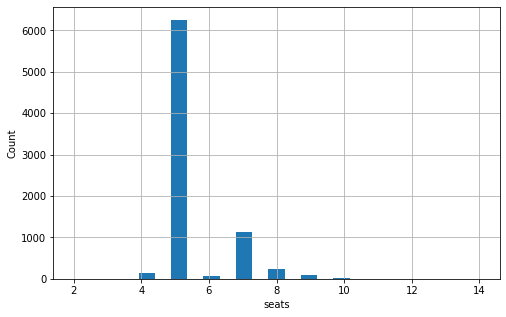

In [41]:
#plt.figure(figsize=(8,5))
for cols in numerical_cols:
    if cols not in ['year', 'selling_price']:
        plt.figure(figsize=(8,5))
        #df.groupby(cols)['selling_price'].median().plot(kind='hist')
        df[cols].hist(bins=25)
        plt.xlabel(cols)
        #plt.ylabel('Selling price')
        plt.ylabel('Count')
        plt.show()

#### We can see that both our feature columns histogram show that they are right skewed. Whenever, we are solving the regression problem statement we should convert non-gaussian distribution into a std normal dist.

In [9]:
#We have year column which are called temporal variables, changing with time.

In [10]:
year_cols = [cols for cols in numerical_cols if 'year' in cols]
year_cols

['year']

Text(0.5, 1.0, 'Selling Price vs Year')

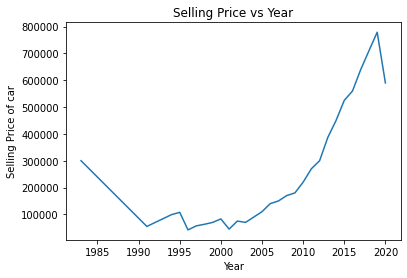

In [11]:
df.groupby('year')['selling_price'].median().plot()
plt.xlabel('Year')
plt.ylabel('Selling Price of car')
plt.title('Selling Price vs Year')

#### Finding all the categorical feature columns

In [72]:
categorical_cols = [cols for cols in df.columns if df[cols].dtypes == 'O' and cols != 'name']
#categorical_cols = df.columns[df.dtypes == object]
#df[categorical_cols].drop('name', axis=1)
df[categorical_cols]

,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)"
3,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
4,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"
...,...,...,...,...,...,...,...,...
8123,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm
8124,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)"
8125,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm
8126,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm


In [223]:
df1[categorical_cols].describe()

,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,8128,8128,8128,8128,7907,7907,7913,7906
unique,4,3,2,5,393,121,322,441
top,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,4402,6766,7078,5289,225,1017,377,530


In [15]:
# We don't have any discrete features having less than 25 unique values. All feature cols have greater than 25 unique values
discrete_cols = [cols for cols in numerical_cols if len(df['km_driven'].unique()) < 25 and cols not in year_cols]
discrete_cols

[]

In [14]:
len(df['km_driven'].unique())

921

#### Using log-normal transformation on our numerical feature columns

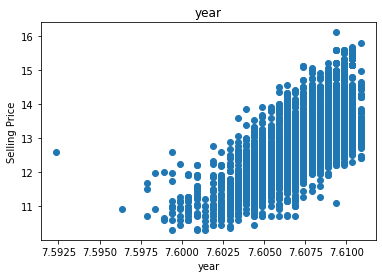

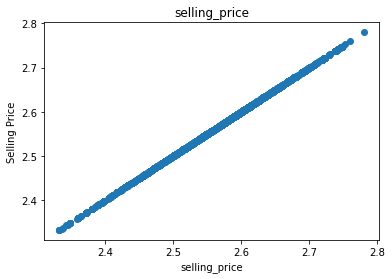

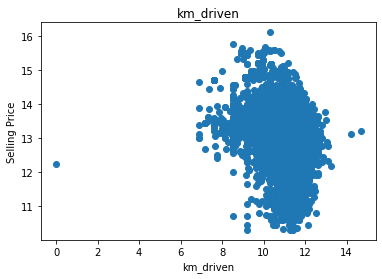

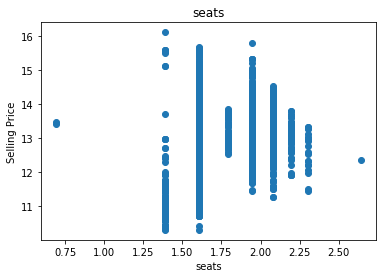

In [47]:
for cols in numerical_cols:
    df1 = df.copy()
    if 0 in df1[cols].unique():
        pass
    else:
        df1[cols]= np.log(df1[cols])
        df1['selling_price'] = np.log(df1['selling_price'])
        plt.scatter(df1[cols], df1['selling_price'])
        plt.xlabel(cols)
        plt.ylabel('Selling Price')
        plt.title(cols)
        plt.show()

### Outliers

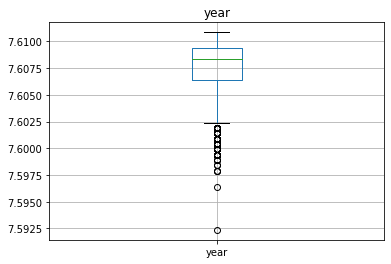

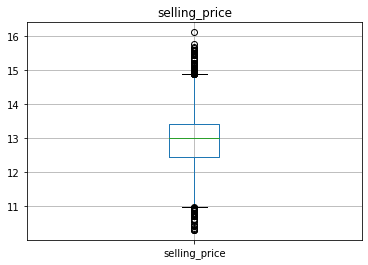

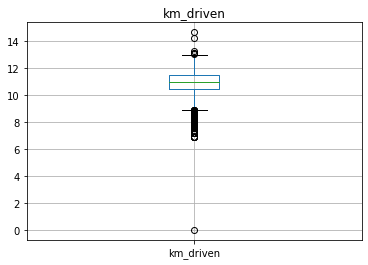

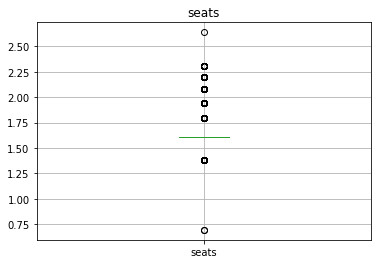

In [48]:
for cols in numerical_cols:
    df1 = df.copy()
    if 0 in df[cols].unique():
        pass
    else:
        df1[cols] = np.log(df1[cols])
        df1.boxplot(column=cols)
        plt.title(cols)
        plt.show()

### Categorical Variables

In [73]:
df[categorical_cols].head()

,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)"
3,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
4,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"


In [74]:
for cols in categorical_cols:
    print(f'The featuere is {cols} and the categories are {len(df[cols].unique())}.')

The featuere is fuel and the categories are 4.
The featuere is seller_type and the categories are 3.
The featuere is transmission and the categories are 2.
The featuere is owner and the categories are 5.
The featuere is mileage and the categories are 394.
The featuere is engine and the categories are 122.
The featuere is max_power and the categories are 323.
The featuere is torque and the categories are 442.


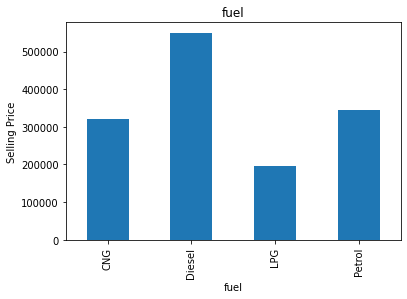

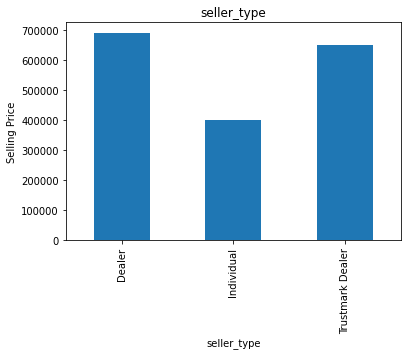

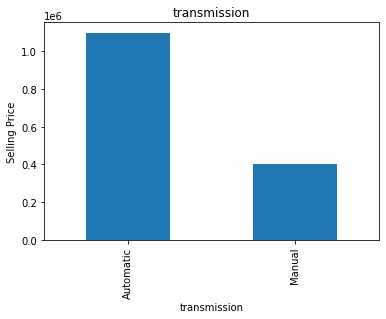

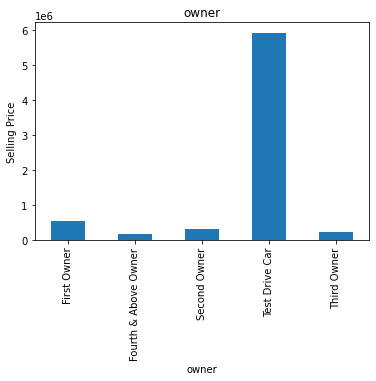

In [76]:
# Finding the relationship b/w categorical variables and dependent feature selling_price.
for cols in categorical_cols:
    df1 = df.copy()
    if len(df1[cols].unique()) < 10:
        df1.groupby(cols)['selling_price'].median().plot(kind='bar', stacked=True)
        plt.xlabel(cols)
        plt.ylabel('Selling Price')
        plt.title(cols)
        plt.show()

### When using categorical data, you usually convert those to either number labels (one additional column with one integer number for each different entry) or use a one-hot encoding (x new columns for x categories, each with a 1 if the category is present for that row).

In [66]:
df[categorical_cols].head()

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)"
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"


In [46]:
#IMP
df['current_year'] = 2022
df['total_years'] = df['current_year'] - df['year']
df.drop(columns=['year', 'current_year'], inplace=True)
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,total_years
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,8
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,8
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,16
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,12
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,15


### One-hot encoding

In [47]:
#IMP
#Create object for one-hot encoding
import category_encoders as ce

columns_for_encode = ['fuel', 'seller_type', 'transmission', 'owner']
df = pd.get_dummies(df, columns=columns_for_encode, drop_first=True)
df.head()
#encoder=ce.OneHotEncoder(cols=columns_for_encode,handle_unknown='return_nan',return_df=True,use_cat_names=True)
#Fit and transform Data
#data_encoded = encoder.fit_transform(df)
#data_encoded.head()

,name,selling_price,km_driven,mileage,engine,max_power,torque,seats,total_years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,450000,145500,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,8,1,0,0,1,0,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,8,1,0,0,1,0,1,0,1,0,0
2,Honda City 2017-2020 EXi,158000,140000,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,16,0,0,1,1,0,1,0,0,0,1
3,Hyundai i20 Sportz Diesel,225000,127000,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,12,1,0,0,1,0,1,0,0,0,0
4,Maruti Swift VXI BSIII,130000,120000,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,15,0,0,1,1,0,1,0,0,0,0


## Correlation

In [157]:
corr_mat = df.corr()
corr_mat

,selling_price,km_driven,seats,total_years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.225534,0.041358,-0.414092,0.206521,-0.037222,-0.195975,-0.386244,0.035084,-0.588845,-0.075669,-0.179881,0.115880,-0.118956
km_driven,-0.225534,1.000000,0.227336,0.418006,0.266368,0.023458,-0.269802,0.204736,-0.084282,0.201229,0.094939,0.209532,-0.024214,0.145634
seats,0.041358,0.227336,1.000000,0.009144,0.354203,-0.028959,-0.345528,0.081313,-0.028152,0.072821,0.007793,0.034312,-0.010925,0.005083
total_years,-0.414092,0.418006,0.009144,1.000000,-0.051762,0.070712,0.044633,0.246161,-0.102238,0.244707,0.207020,0.311225,-0.031877,0.280220
fuel_Diesel,0.206521,0.266368,0.354203,-0.051762,1.000000,-0.074494,-0.976687,-0.000239,-0.137961,0.025519,-0.010638,0.046762,-0.017008,-0.014272
fuel_LPG,-0.037222,0.023458,-0.028959,0.070712,-0.074494,1.000000,-0.061584,0.021092,-0.011852,0.026397,0.014785,0.017122,-0.001700,0.017199
fuel_Petrol,-0.195975,-0.269802,-0.345528,0.044633,-0.976687,-0.061584,1.000000,-0.008983,0.142335,-0.034631,0.007300,-0.051046,0.017630,0.012820
seller_type_Individual,-0.386244,0.204736,0.081313,0.246161,-0.000239,0.021092,-0.008983,1.000000,-0.385425,0.375234,0.066360,0.165983,-0.055297,0.116236
seller_type_Trustmark Dealer,0.035084,-0.084282,-0.028152,-0.102238,-0.137961,-0.011852,0.142335,-0.385425,1.000000,-0.149677,-0.025577,-0.047034,-0.004290,-0.046814
transmission_Manual,-0.588845,0.201229,0.072821,0.244707,0.025519,0.026397,-0.034631,0.375234,-0.149677,1.000000,0.041761,0.119681,-0.049621,0.072274


### Heatmap

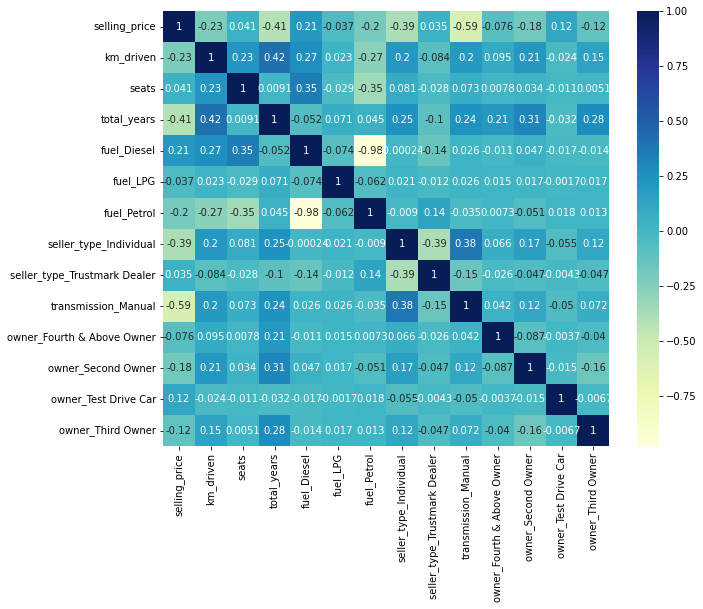

In [160]:
top_corr_features = corr_mat.index
plt.figure(figsize=(10,8))
#plot heat-map
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='YlGnBu')

### Pre-Processing of data

In [217]:
df.shape

(8128, 19)

In [236]:
df.mode().iloc[0]   #first row of dataframe containing mode of each column

name                            Maruti Swift Dzire VDI
selling_price                                   300000
km_driven                                       120000
mileage                                      18.9 kmpl
engine                                         1248 CC
max_power                                       74 bhp
torque                                  190Nm@ 2000rpm
seats                                              5.0
total_years                                          5
fuel_Diesel                                          1
fuel_LPG                                             0
fuel_Petrol                                          0
seller_type_Individual                               1
seller_type_Trustmark Dealer                         0
transmission_Manual                                  1
owner_Fourth & Above Owner                           0
owner_Second Owner                                   0
owner_Test Drive Car                                 0
owner_Thir

In [48]:
#IMP
# Filling all missing values in categorical columns with their respective mode values
df= df.fillna(df.mode().iloc[0])

In [49]:
#IMP
#Checking after removing missing values
df.isnull().sum()

name                            0
selling_price                   0
km_driven                       0
mileage                         0
engine                          0
max_power                       0
torque                          0
seats                           0
total_years                     0
fuel_Diesel                     0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Manual             0
owner_Fourth & Above Owner      0
owner_Second Owner              0
owner_Test Drive Car            0
owner_Third Owner               0
dtype: int64

In [241]:
s='250Nm@1500-2500@rpm'
t=s.split('@')[0]
t

'250Nm'

#### Cleaning of data

In [50]:
#IMP
##Replacing all the 'at' with '@' in torque column

#df['torque'].replace({'a':'@', 't':''})
df['torque'] = df['torque'].replace(to_replace='at', value='@', regex=True)

#Removing everything after '@' in values of torque column
df['torque'] = df['torque'].apply(lambda x: x.split('@')[0])

In [29]:
df.head()

,name,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,23.4 kmpl,1248 CC,74 bhp,190Nm,5.0,1,0,0,1,0,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14 kmpl,1498 CC,103.52 bhp,250Nm,5.0,1,0,0,1,0,1,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,17.7 kmpl,1497 CC,78 bhp,12.7,5.0,0,0,1,1,0,1,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.0 kmpl,1396 CC,90 bhp,22.4 kgm,5.0,1,0,0,1,0,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,16.1 kmpl,1298 CC,88.2 bhp,11.5,5.0,0,0,1,1,0,1,0,0,0,0


In [51]:
#IMP
df['mileage'] = df['mileage'].replace([' kmpl',' km/kg'],'', regex=True)
df['engine'] = df['engine'].replace(' CC', '', regex=True)
df['torque'] = df['torque'].replace(['Nm','kgm','nm',' KGM '],'', regex=True)
df['max_power'] = df['max_power'].replace(' bhp','', regex=True)

In [31]:
df[777:780]

,name,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
777,Tata Indica Vista Quadrajet ZX,2012,250000,40000,22.3,1248,74,190,5.0,1,0,0,1,0,1,0,0,0,0
778,Ford Endeavour Hurricane Limited Edition,2013,1075000,110000,12.8,2953,156,380(38.7),7.0,1,0,0,1,0,0,0,0,0,1
779,Hyundai Grand i10 Sportz,2017,500000,20000,18.9,1197,82,114,5.0,0,0,1,1,0,1,0,0,0,0


In [52]:
df.head(3)

,name,selling_price,km_driven,mileage,engine,max_power,torque,seats,total_years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,450000,145500,23.4,1248,74,190,5.0,8,1,0,0,1,0,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,21.14,1498,103.52,250,5.0,8,1,0,0,1,0,1,0,1,0,0
2,Honda City 2017-2020 EXi,158000,140000,17.7,1497,78,12.7,5.0,16,0,0,1,1,0,1,0,0,0,1


## Feature

In [53]:
#IMP
# Storing our independent feature(x) and dependent feature or label(y) columns
x = df.iloc[:,2:]
y = df.iloc[:,1]

In [279]:
# Finding row where mileage=17.3 km/kg
k = x['mileage'][x['mileage'] == '17.3 km/kg'].index
x.iloc[k]

,km_driven,mileage,engine,max_power,torque,seats,total_years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner


In [314]:
#Finding row where torque = 380(38.7)
k = x['torque'][x['torque'] == '400  /2000 rpm'].index
x.iloc[k]

,km_driven,mileage,engine,max_power,torque,seats,total_years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2138,20000,19.5,1199.0,88.76,110,5.0,4,0,0,1,1,0,1,0,0,0,0


In [56]:
#IMP
#we can specify a regex to replace all non-numeric values into an empty string.
#x['torque'] = x['torque'].str.replace(r'\D', '')
x['max_power'] = x['max_power'].str.replace(r'\D', '')

C:\Anaconda\envs\MLProject\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [313]:
x[2137:2139]

,km_driven,mileage,engine,max_power,torque,seats,total_years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2138,20000,19.50,1199.0,88.76,110,5.0,4,0,0,1,1,0,1,0,0,0,0
2139,19000,18.78,999.0,75,95,5.0,4,0,0,1,1,0,1,0,0,0,0


In [54]:
#IMP
#remove all the commas with nothing
x['max_power']=x['max_power'].str.replace(',','', regex=True)
#remove all the leading and trailing spaces
#x['max_power']=x['max_power'].str.strip()
#remove all the spaces
x['max_power']=x['max_power'].str.replace(' ','')

In [55]:
#IMP
# Replacing all (*) values with ''.
x['torque'] = x['torque'].str.replace(r"\(.*?\)", "", regex=True)
#to remove this: '400  /2000 rpm'
x['torque'] = x['torque'].str.split('/').str[0]
# to remove the whitespaces
x['torque']=x['torque'].str.replace('  ','')
# to replace all non-numeric values with empty string
x['torque'] = x['torque'].str.replace(r'\D', '', regex=True)

In [57]:
x.dtypes

km_driven                         int64
mileage                          object
engine                           object
max_power                        object
torque                           object
seats                           float64
total_years                       int64
fuel_Diesel                       uint8
fuel_LPG                          uint8
fuel_Petrol                       uint8
seller_type_Individual            uint8
seller_type_Trustmark Dealer      uint8
transmission_Manual               uint8
owner_Fourth & Above Owner        uint8
owner_Second Owner                uint8
owner_Test Drive Car              uint8
owner_Third Owner                 uint8
dtype: object

In [338]:
x.shape

(8127, 17)

In [355]:
x

,km_driven,mileage,engine,max_power,torque,seats,total_years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,145500,23.40,1248.0,74,190,5.0,8,1,0,0,1,0,1,0,0,0,0
1,120000,21.14,1498.0,103.52,250,5.0,8,1,0,0,1,0,1,0,1,0,0
2,140000,17.70,1497.0,78,12.7,5.0,16,0,0,1,1,0,1,0,0,0,1
3,127000,23.00,1396.0,90,22.4,5.0,12,1,0,0,1,0,1,0,0,0,0
4,120000,16.10,1298.0,88.2,11.5,5.0,15,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,110000,18.50,1197.0,82.85,113.7,5.0,9,0,0,1,1,0,1,0,0,0,0
8124,119000,16.80,1493.0,110,24,5.0,15,1,0,0,1,0,1,1,0,0,0
8125,120000,19.30,1248.0,73.9,190,5.0,13,1,0,0,1,0,1,0,0,0,0
8126,25000,23.57,1396.0,70,140,5.0,9,1,0,0,1,0,1,0,0,0,0


##### Changing data type from str to float64

In [58]:
#IMP
x['mileage'] = x['mileage'].astype("float64")
x['engine'] = x['engine'].astype('float64')
x['torque'] = x['torque'].astype('float64')

In [59]:
#IMP
#x['max_power'] = x['max_power'].astype('float64')
#x['max_power'] = x['max_power'].apply(lambda x: float(x))
x['max_power'] = pd.to_numeric(x['max_power'].str.replace(",", ""), errors='coerce')

In [60]:
x['max_power'][x['max_power'].isna() == True]

4933   NaN
Name: max_power, dtype: float64

In [42]:
x['max_power'].mode()[0]

74.0

In [61]:
#IMP
#df= df.fillna(df.mode().iloc[0])
x['max_power'] = x['max_power'].fillna(x['max_power'].mode()[0])
#x['max_power'] = x['max_power'].fillna(0)

In [21]:
x[4932:4936]

,km_driven,mileage,engine,max_power,torque,seats,total_years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
4932,59500,23.1,998.0,6704.0,90.0,5.0,5,0,0,1,1,0,1,0,1,0,0
4933,100000,10.9,796.0,74.0,190.0,8.0,22,0,0,0,1,0,1,0,1,0,0
4934,45000,24.3,1248.0,885.0,200.0,5.0,6,1,0,0,1,0,1,0,0,0,0
4935,75500,23.0,1396.0,90.0,224.0,5.0,11,1,0,0,1,0,1,0,1,0,0


In [62]:
#IMP
x.columns = x.columns.str.replace(' ','_')

In [65]:
x.head()

,km_driven,mileage,engine,max_power,torque,seats,total_years,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,transmission_Manual,owner_Fourth_and_Above_Owner,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner
0,145500,23.40,1248.0,74.0,190.0,5.0,8,1,0,0,1,0,1,0,0,0,0
1,120000,21.14,1498.0,10352.0,250.0,5.0,8,1,0,0,1,0,1,0,1,0,0
2,140000,17.70,1497.0,78.0,127.0,5.0,16,0,0,1,1,0,1,0,0,0,1
3,127000,23.00,1396.0,90.0,224.0,5.0,12,1,0,0,1,0,1,0,0,0,0
4,120000,16.10,1298.0,882.0,115.0,5.0,15,0,0,1,1,0,1,0,0,0,0


In [64]:
x = x.rename(columns={'owner_Fourth_&_Above_Owner': 'owner_Fourth_and_Above_Owner'})

In [24]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64

In [66]:
#Feature importance using extra trees regressor from sklearn lib
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

C:\Anaconda\envs\MLProject\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\envs\MLProject\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [67]:
zip_lists = zip(x.columns,model.feature_importances_)
Final_List = list(zip_lists)

print(Final_List)

[('km_driven', 0.03709738226148815), ('mileage', 0.032497925980054396), ('engine', 0.17202965723933206), ('max_power', 0.07682109535820468), ('torque', 0.02717771148040495), ('seats', 0.014940257223200627), ('total_years', 0.18247232744786357), ('fuel_Diesel', 0.0510739550697901), ('fuel_LPG', 5.650866158737742e-06), ('fuel_Petrol', 0.010263611988753788), ('seller_type_Individual', 0.03725766803302265), ('seller_type_Trustmark_Dealer', 0.0004873665958688978), ('transmission_Manual', 0.34687686063691126), ('owner_Fourth_and_Above_Owner', 0.0003540758004996896), ('owner_Second_Owner', 0.005725917139195564), ('owner_Test_Drive_Car', 0.0033423453975716154), ('owner_Third_Owner', 0.0015761914816793086)]


C:\Anaconda\envs\MLProject\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [68]:
(model.feature_importances_).max()

C:\Anaconda\envs\MLProject\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


0.34687686063691126

#### We can see that feature 'transmission_Manual' has the highest feature importance equal to 0.346

C:\Anaconda\envs\MLProject\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


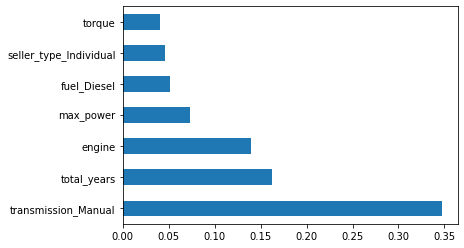

In [28]:
#converting our feature importance data into series.
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
#plotting top 7 important features
feature_importances.nlargest(7).plot(kind='barh')
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [70]:
print(train_x.shape)
print(test_x.shape)

(6502, 17)
(1626, 17)


#### Since we are going to use random forest regressor which uses decision trees, so don't need to scale down these values.

In [71]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

### Hyper-parameter tuning using randomized search CV

In [72]:
#Number of trees in random forest
# from 100 to 1200 we want 12 equally spaced numbers
n_estimators = [int(x) for x in np.linspace(start=100, stop=1500, num=15)]

#Number of features to consider at every split
max_features = ['auto', 'sqrt']

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num=6)]

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 20]


In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
#Create the random grid
param_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

In [75]:
#Use parameter grid to search for the best hyperparameters
#first create a base model to tune
rf_model = RandomForestRegressor()
random_cv = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, scoring='neg_mean_squared_error', 
                               n_iter=10, cv=5, verbose=2, random_state=30, n_jobs=-1)

In [76]:
random_cv.fit(train_x, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   50.6s finished
C:\Anaconda\envs\MLProject\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda\envs\MLProject\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [77]:
 random_cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 14}

In [78]:
rf_final = RandomForestRegressor(n_estimators=900, min_samples_split=5, min_samples_leaf=1, max_features='auto', max_depth=10, n_jobs=-1, random_state=30, verbose=3)
rf_final.fit(train_x, train_y)

C:\Anaconda\envs\MLProject\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


building tree 1 of 900
building tree 2 of 900
building tree 3 of 900
building tree 4 of 900
building tree 5 of 900
building tree 6 of 900
building tree 7 of 900
building tree 8 of 900
building tree 9 of 900
building tree 10 of 900
building tree 11 of 900
building tree 12 of 900
building tree 13 of 900
building tree 14 of 900
building tree 15 of 900
building tree 16 of 900
building tree 17 of 900
building tree 18 of 900
building tree 19 of 900
building tree 20 of 900
building tree 21 of 900
building tree 22 of 900
building tree 23 of 900
building tree 24 of 900
building tree 25 of 900
building tree 26 of 900
building tree 27 of 900
building tree 28 of 900
building tree 29 of 900
building tree 30 of 900
building tree 31 of 900
building tree 32 of 900
building tree 33 of 900
building tree 34 of 900
building tree 35 of 900
building tree 36 of 900
building tree 37 of 900
building tree 38 of 900
building tree 39 of 900
building tree 40 of 900
building tree 41 of 900
building tree 42 of 900
b

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.2s


building tree 169 of 900building tree 170 of 900

building tree 171 of 900
building tree 172 of 900
building tree 173 of 900
building tree 174 of 900
building tree 175 of 900
building tree 176 of 900
building tree 177 of 900
building tree 178 of 900
building tree 179 of 900
building tree 180 of 900
building tree 181 of 900
building tree 182 of 900
building tree 183 of 900
building tree 184 of 900
building tree 185 of 900
building tree 186 of 900
building tree 187 of 900
building tree 188 of 900
building tree 189 of 900
building tree 190 of 900
building tree 191 of 900
building tree 192 of 900
building tree 193 of 900
building tree 194 of 900
building tree 195 of 900
building tree 196 of 900
building tree 197 of 900
building tree 198 of 900
building tree 199 of 900
building tree 200 of 900
building tree 201 of 900
building tree 202 of 900
building tree 203 of 900
building tree 204 of 900
building tree 205 of 900
building tree 206 of 900
building tree 207 of 900
building tree 208 of 900


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    0.6s


building tree 345 of 900
building tree 346 of 900
building tree 347 of 900
building tree 348 of 900
building tree 349 of 900
building tree 350 of 900
building tree 351 of 900
building tree 352 of 900
building tree 353 of 900
building tree 354 of 900
building tree 355 of 900
building tree 356 of 900
building tree 357 of 900
building tree 358 of 900
building tree 359 of 900
building tree 360 of 900
building tree 361 of 900
building tree 362 of 900
building tree 363 of 900
building tree 364 of 900
building tree 365 of 900
building tree 366 of 900
building tree 367 of 900
building tree 368 of 900
building tree 369 of 900
building tree 370 of 900
building tree 371 of 900
building tree 372 of 900
building tree 373 of 900
building tree 374 of 900
building tree 375 of 900
building tree 376 of 900
building tree 377 of 900
building tree 378 of 900
building tree 379 of 900
building tree 380 of 900
building tree 381 of 900
building tree 382 of 900
building tree 383 of 900
building tree 384 of 900


[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:    1.1s


building tree 529 of 900
building tree 530 of 900
building tree 531 of 900
building tree 532 of 900
building tree 533 of 900
building tree 534 of 900
building tree 535 of 900
building tree 536 of 900
building tree 537 of 900
building tree 538 of 900
building tree 539 of 900
building tree 540 of 900
building tree 541 of 900
building tree 542 of 900
building tree 543 of 900
building tree 544 of 900
building tree 545 of 900
building tree 546 of 900
building tree 547 of 900
building tree 548 of 900
building tree 549 of 900
building tree 550 of 900
building tree 551 of 900
building tree 552 of 900
building tree 553 of 900
building tree 554 of 900
building tree 555 of 900
building tree 556 of 900
building tree 557 of 900
building tree 558 of 900
building tree 559 of 900
building tree 560 of 900
building tree 561 of 900
building tree 562 of 900
building tree 563 of 900
building tree 564 of 900
building tree 565 of 900
building tree 566 of 900
building tree 567 of 900
building tree 568 of 900


[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    1.8s


building tree 801 of 900
building tree 802 of 900
building tree 803 of 900
building tree 804 of 900
building tree 805 of 900
building tree 806 of 900
building tree 807 of 900
building tree 808 of 900
building tree 809 of 900
building tree 810 of 900
building tree 811 of 900
building tree 812 of 900
building tree 813 of 900
building tree 814 of 900
building tree 815 of 900
building tree 816 of 900
building tree 817 of 900
building tree 818 of 900
building tree 819 of 900
building tree 820 of 900
building tree 821 of 900
building tree 822 of 900
building tree 823 of 900
building tree 824 of 900
building tree 825 of 900
building tree 826 of 900
building tree 827 of 900
building tree 828 of 900
building tree 829 of 900
building tree 830 of 900
building tree 831 of 900
building tree 832 of 900
building tree 833 of 900
building tree 834 of 900
building tree 835 of 900
building tree 836 of 900
building tree 837 of 900
building tree 838 of 900
building tree 839 of 900
building tree 840 of 900


[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    2.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=-1,
                      oob_score=False, random_state=30, verbose=3,
                      warm_start=False)

In [79]:
predictions = rf_final.predict(test_x)
predictions

C:\Anaconda\envs\MLProject\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 900 out of 900 | elapsed:    0.0s finished


array([570274.23459865, 332872.02573009, 368739.26338348, ...,
       349957.49149056, 148102.24703527, 784234.60578347])

C:\Anaconda\envs\MLProject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

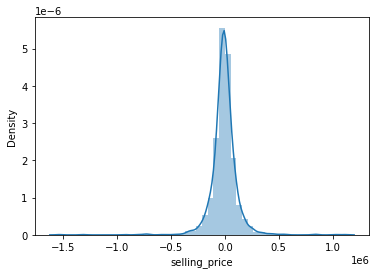

In [80]:
#plot of difference between true y and predicted y
sns.distplot(test_y-predictions)

### We can see that our graph looks like a normal distribution with mean almost at 0 and small sd.

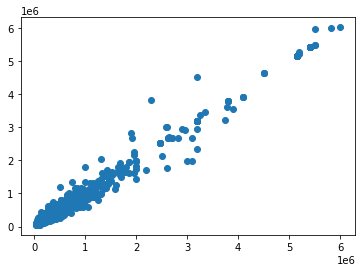

In [81]:
plt.scatter(test_y, predictions)

Our scatter plot is also linearly so we can say that pur predictions are pretty much good.

In [82]:
import pickle
#open a file where you want to store data in serialized format
with open("car_prediction_RFmodel.pkl", 'wb') as file:
    #dump our final model into that file
    pickle.dump(rf_final, file)

In [83]:
rf_final.score(test_x, test_y)

C:\Anaconda\envs\MLProject\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 496 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 900 out of 900 | elapsed:    0.0s finished


0.9764650518438894

In [434]:
!conda info


     active environment : MLProject
    active env location : C:\Anaconda\envs\MLProject
            shell level : 2
       user config file : C:\Users\Mohammad Irfan\.condarc
 populated config files : C:\Users\Mohammad Irfan\.condarc
          conda version : 4.13.0
    conda-build version : 3.21.9
         python version : 3.8.8.final.0
       virtual packages : __cuda=11.6=0
                          __win=0=0
                          __archspec=1=x86_64
       base environment : C:\Anaconda  (writable)
      conda av data dir : C:\Anaconda\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noar